In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
template = cv2.imread("../template_images/labeled_pokemon_templates/アラブルタケ_1920.png")
template.shape

[ WARN:0@0.685] global loadsave.cpp:248 findDecoder imread_('../template_images/labeled_pokemon_templates/アラブルタケ_1920.png'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

In [2]:
# (100, 105, 3) の白い四角を作る
# https://pokemondb.net/sprites から得られる generation 9 の画像を所定の位置に配置する
# これを保存する

canvas_height = 100
canvas_width = 105
canvas_channels = 3
canvas_color = (255, 255, 255) # White color

canvas = np.full((canvas_height, canvas_width, canvas_channels), canvas_color, dtype=np.uint8)
canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)

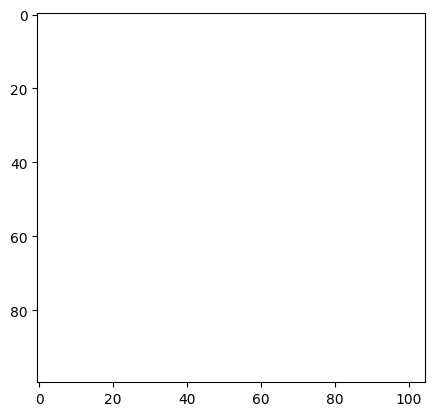

In [5]:
plt.imshow(canvas)
plt.show()

In [40]:
image_path = '/Users/yusuke-fukasawa/Downloads/pikachu.png'
image = cv2.cvtColor(cv2.imread(image_path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGRA2RGBA)

# 画像がキャンバスに収まるようにリサイズする
max_height = int(canvas_height * 1)
max_width = int(canvas_width * 1)
image_height, image_width = image.shape[:2]
aspect_ratio = float(image_width) / float(image_height)

if image_width > max_width or image_height > max_height:
    new_height = max_height
    new_width = int(new_height * aspect_ratio)
    image = cv2.resize(image, (new_width, new_height))

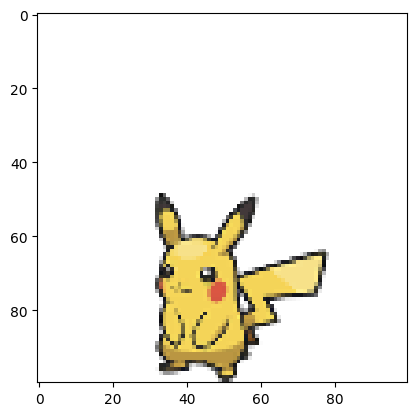

In [41]:
plt.imshow(image)
plt.show()

In [32]:
image_height, image_width = image.shape[:2]

x_offset = (canvas_width - image_width) // 2
y_offset = canvas_height - image_height

# アルファチャンネルを取得し、正規化する
alpha = image[:, :, 3] / 255.0
alpha_inv = 1.0 - alpha

# 各チャンネルに対してアルファブレンディングを適用する
for channel in range(canvas_channels):
    canvas[y_offset: y_offset + image_height, x_offset: x_offset + image_width, channel] = (
        alpha * image[:, :, channel] + alpha_inv * canvas[y_offset: y_offset + image_height, x_offset: x_offset + image_width, channel]
    )

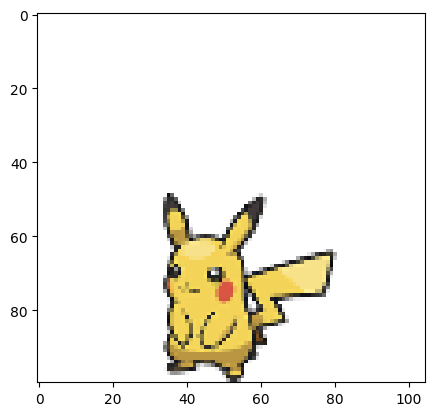

In [33]:
from matplotlib import pyplot as plt

plt.imshow(canvas)
plt.show()

In [35]:
cv2.imwrite("../experimental/imgs/ピカチュウ/2.png",  cv2.cvtColor(canvas, cv2.COLOR_RGB2BGR))

True

In [6]:
def generate_sprites(image_path):
    canvas_height = 100
    canvas_width = 105
    canvas_channels = 3
    canvas_color = (255, 255, 255) # White color

    canvas = np.full((canvas_height, canvas_width, canvas_channels), canvas_color, dtype=np.uint8)
    canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)
    
    image = cv2.cvtColor(cv2.imread(image_path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGRA2RGBA)

    # 画像がキャンバスに収まるようにリサイズする
    max_height = int(canvas_height * 1)
    max_width = int(canvas_width * 1)
    image_height, image_width = image.shape[:2]
    aspect_ratio = float(image_width) / float(image_height)

    if image_width > max_width or image_height > max_height:
        new_height = max_height
        new_width = int(new_height * aspect_ratio)
        image = cv2.resize(image, (new_width, new_height))
    
    image_height, image_width = image.shape[:2]

    x_offset = (canvas_width - image_width) // 2
    y_offset = canvas_height - image_height

    # アルファチャンネルを取得し、正規化する
    alpha = image[:, :, 3] / 255.0
    alpha_inv = 1.0 - alpha

    # 各チャンネルに対してアルファブレンディングを適用する
    for channel in range(canvas_channels):
        canvas[y_offset: y_offset + image_height, x_offset: x_offset + image_width, channel] = (
            alpha * image[:, :, channel] + alpha_inv * canvas[y_offset: y_offset + image_height, x_offset: x_offset + image_width, channel]
        )
    
    return canvas

In [44]:
tyrantier = generate_sprites("/Users/yusuke-fukasawa/Downloads/tyranitar.png")
cv2.imwrite("../experimental/imgs/バンギラス/2.png",  cv2.cvtColor(tyrantier, cv2.COLOR_RGB2BGR))

True

In [48]:
azumarill = generate_sprites("/Users/yusuke-fukasawa/Downloads/azumarill.png")
cv2.imwrite("../experimental/imgs/マリルリ/2.png",  cv2.cvtColor(azumarill, cv2.COLOR_RGB2BGR))

True

In [49]:
bundle = generate_sprites("/Users/yusuke-fukasawa/Downloads/iron-bundle (1).png")
cv2.imwrite("../experimental/imgs/テツノツツミ/4.png",  cv2.cvtColor(bundle, cv2.COLOR_RGB2BGR))

True

In [51]:
kurage = generate_sprites("/Users/yusuke-fukasawa/Downloads/staraptor.png")
cv2.imwrite("../experimental/imgs/ムクホーク/2.png",  cv2.cvtColor(kurage, cv2.COLOR_RGB2BGR))

True

In [6]:
kujira = generate_sprites("/Users/yusuke-fukasawa/Downloads/cetitan.png")
cv2.imwrite("../experimental/imgs/ハルクジラ/2.png",  cv2.cvtColor(kujira, cv2.COLOR_RGB2BGR))

True

In [7]:
dohido = generate_sprites("/Users/yusuke-fukasawa/Downloads/toxapex.png")
cv2.imwrite("../experimental/imgs/ドヒドイデ/2.png",  cv2.cvtColor(dohido, cv2.COLOR_RGB2BGR))

True

In [3]:
scovillain = generate_sprites("/Users/yusuke-fukasawa/Downloads/scovillain.png")
cv2.imwrite("../template_images/unknown_pokemon_templates/1.png",  cv2.cvtColor(scovillain, cv2.COLOR_RGB2BGR))

True

In [4]:
kilowattrel = generate_sprites("/Users/yusuke-fukasawa/Downloads/kilowattrel.png")
cv2.imwrite("../template_images/unknown_pokemon_templates/2.png",  cv2.cvtColor(kilowattrel, cv2.COLOR_RGB2BGR))

True

In [4]:
kuesu = generate_sprites("/Users/yusuke-fukasawa/Downloads/espathra.png")
cv2.imwrite("../experimental/imgs/クエスパトラ/10.png",  cv2.cvtColor(kuesu, cv2.COLOR_RGB2BGR))

True

In [5]:
dore = generate_sprites("/Users/yusuke-fukasawa/Downloads/lilligant-hisuian.png")
cv2.imwrite("../experimental/imgs/ヒスイドレディア/10.png",  cv2.cvtColor(dore, cv2.COLOR_RGB2BGR))

True

In [6]:
ura = generate_sprites("/Users/yusuke-fukasawa/Downloads/urshifu.png")
cv2.imwrite("../experimental/imgs/ウーラオス/10.png",  cv2.cvtColor(ura, cv2.COLOR_RGB2BGR))

True

In [8]:
idaitou = generate_sprites("/Users/yusuke_fukasawa/Downloads/basculegion-male.png")
cv2.imwrite("../experimental/imgs/イダイトウ・オス/1.png",  cv2.cvtColor(idaitou, cv2.COLOR_RGB2BGR))

True